In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
import os

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Embedding
pd.set_option('display.max_colwidth', -1)

<ipython-input-1-e4c7fa136305>:14: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


<h1> Assesing Data Quality </h1>

In [2]:
dataset = pd.read_json('News_Category_Dataset_v2.json', lines=True)
dataset.drop(['authors','link','date'], axis=1, inplace=True)
dataset.head(
)

,category,headline,short_description
0,CRIME,"There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV",She left her husband. He killed their children. Just another day in America.
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song,Of course it has a song.
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Eberstein tied the knot in a civil ceremony.
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And Democrats In New Artwork,The actor gives Dems an ass-kicking for not fighting hard enough against Donald Trump.
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags To Pick Up After Her Dog,"The ""Dietland"" actress said using the bags is a ""really cathartic, therapeutic moment."""


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   category           200853 non-null  object
 1   headline           200853 non-null  object
 2   short_description  200853 non-null  object
dtypes: object(3)
memory usage: 4.6+ MB


In [4]:
dataset.describe()

,category,headline,short_description
count,200853,200853,200853
unique,41,199344,178353
top,POLITICS,Sunday Roundup,
freq,32739,90,19712


In [5]:
print("Unique Categories : ".format(dataset['category'].nunique()))
dataset['category'].value_counts()

Unique Categories : 


POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL            9887 
STYLE & BEAUTY    9649 
PARENTING         8677 
HEALTHY LIVING    6694 
QUEER VOICES      6314 
FOOD & DRINK      6226 
BUSINESS          5937 
COMEDY            5175 
SPORTS            4884 
BLACK VOICES      4528 
HOME & LIVING     4195 
PARENTS           3955 
THE WORLDPOST     3664 
WEDDINGS          3651 
WOMEN             3490 
IMPACT            3459 
DIVORCE           3426 
CRIME             3405 
MEDIA             2815 
WEIRD NEWS        2670 
GREEN             2622 
WORLDPOST         2579 
RELIGION          2556 
STYLE             2254 
SCIENCE           2178 
WORLD NEWS        2177 
TASTE             2096 
TECH              2082 
MONEY             1707 
ARTS              1509 
FIFTY             1401 
GOOD NEWS         1398 
ARTS & CULTURE    1339 
ENVIRONMENT       1323 
COLLEGE           1144 
LATINO VOICES     1129 
CULTURE & ARTS    1030 
EDUCATION         1004 
Name: category, 

([<matplotlib.patches.Wedge at 0x25e2d944cd0>,
 [Text(0.9589004709686384, 0.5389896907883523, 'POLITICS'),
  Text(0.29107333932903573, 1.0607904180995622, 'WELLNESS'),
  Text(-0.28512889841431344, 1.0624036480025096, 'ENTERTAINMENT'),
  Text(-0.6813713198407311, 0.8635584082727121, 'TRAVEL'),
  Text(-0.9095958591186664, 0.6185752768048327, 'STYLE & BEAUTY'),
  Text(-1.0473745779229588, 0.3361643846702145, 'PARENTING'),
  Text(-1.0972944706732304, 0.07710281856038383, 'HEALTHY LIVING'),
  Text(-1.0902400491939765, -0.14620750710382757, 'QUEER VOICES'),
  Text(-1.0408418480326447, -0.3558767306020294, 'FOOD & DRINK'),
  Text(-0.9547670467873225, -0.5462782133391508, 'BUSINESS'),
  Text(-0.8459134183976083, -0.7031575133459594, 'COMEDY'),
  Text(-0.7252892802260477, -0.8270159974203534, 'SPORTS'),
  Text(-0.5961338225228244, -0.9244590124198725, 'BLACK VOICES'),
  Text(-0.4648527831610959, -0.9969512977008372, 'HOME & LIVING'),
  Text(-0.33433726205846925, -1.0479592526426047, 'PARENTS'),

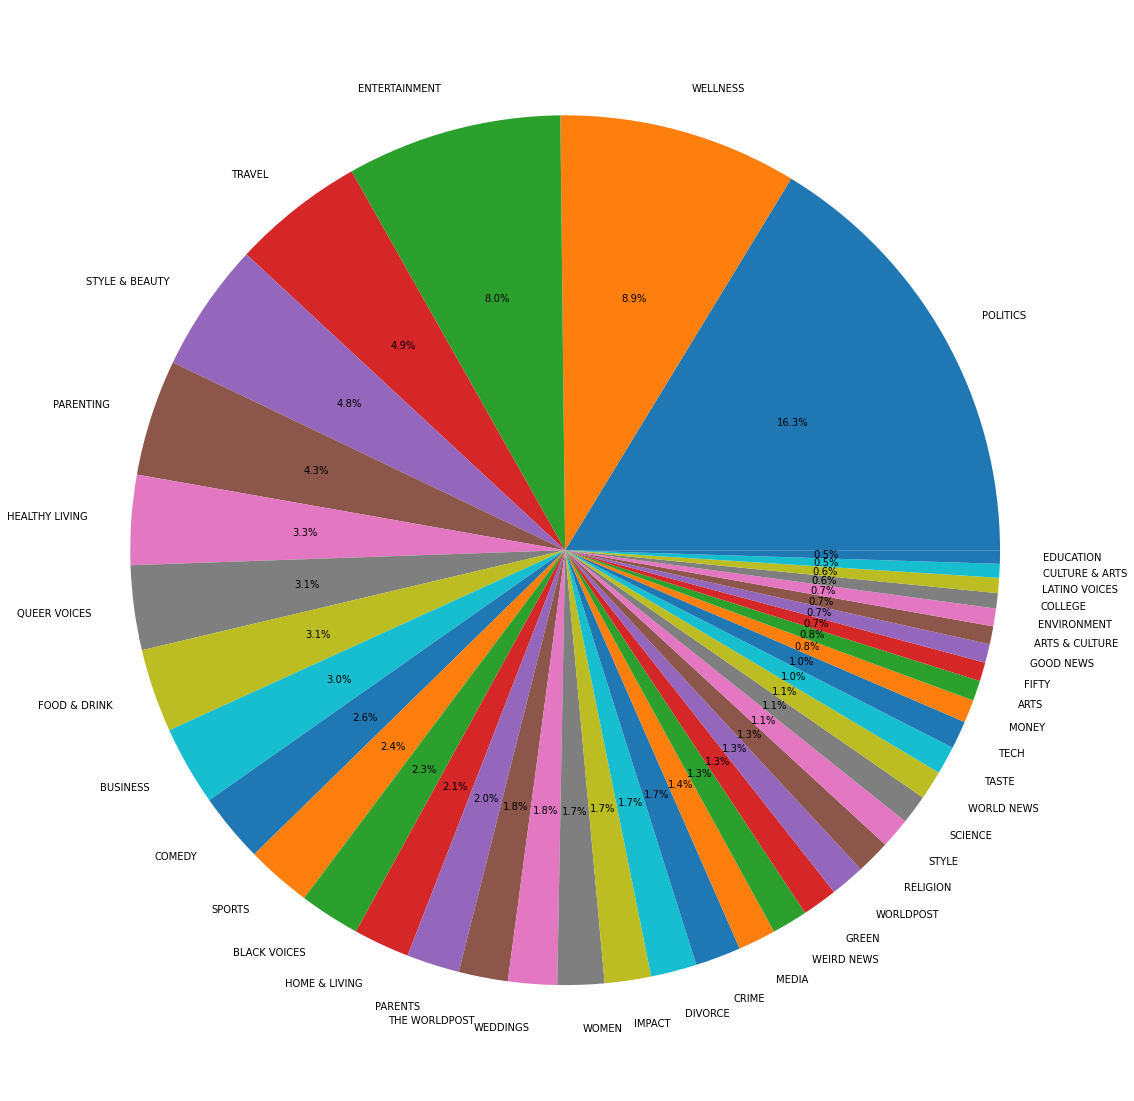

In [6]:
fig = plt.figure(figsize=(20,20))
plt.pie(dataset['category'].value_counts().values, labels=dataset['category'].value_counts().index, autopct='%1.1f%%')

<h3> Grouping the Categories</h3>

In [7]:
categories = dataset['category'].value_counts().index

def groups(grouplist, name):
    for element in categories:
        if element in grouplist:
            dataset.loc[dataset['category']==element, 'category']=name

In [8]:
groups(grouplist=['WELLNESS', 'HEALTHY LIVING' , 'HOME & LIVING', 'STYLE & BEAUTY', 'STYLE'] , name='LIFESTYLE AND WELLNESS')

groups(grouplist=['PARENTING', 'PARENTS', 'EDUCATION', 'COLLEGE'] , name='PARENTING AND EDUCATION')

groups(grouplist=['SPORTS', 'ENTERTAINMENT', 'COMEDY', 'WEIRD NEWS', 'ARTS'] , name='SPORTS AND ENTERTAINMENT')

groups(grouplist=['TRAVEL', 'ARTS & CULTURE','CULTURE & ARTS','FOOD & DRINK', 'TASTE'] , name='TRAVEL-TOURISM & ART-CULTURE')

groups(grouplist=['WOMEN','QUEER VOICES', 'LATINO VOICES', 'BLACK VOICES'] , name='EMPOWERED VOICES')

groups(grouplist=['BUSINESS' ,  'MONEY'] , name='BUSINESS-MONEY')

groups(grouplist=['THE WORLDPOST' , 'WORLDPOST' , 'WORLD NEWS'] , name='WORLDNEWS')

groups(grouplist=['ENVIRONMENT' ,'GREEN'] , name='ENVIRONMENT')

groups(grouplist=['TECH', 'SCIENCE'] , name='SCIENCE AND TECH')

groups(grouplist=['FIFTY' , 'IMPACT' ,'GOOD NEWS','CRIME'] , name='GENERAL')
groups(grouplist=['WEDDINGS', 'DIVORCE',  'RELIGION','MEDIA'] , name='MISC')

In [9]:
print("The revised Categories are : ".format(dataset['category'].nunique()))
dataset['category'].value_counts()

The revised Categories are : 


LIFESTYLE AND WELLNESS          40619
POLITICS                        32739
SPORTS AND ENTERTAINMENT        30296
TRAVEL-TOURISM & ART-CULTURE    20578
EMPOWERED VOICES                15461
PARENTING AND EDUCATION         14780
MISC                            12448
GENERAL                         9663 
WORLDNEWS                       8420 
BUSINESS-MONEY                  7644 
SCIENCE AND TECH                4260 
ENVIRONMENT                     3945 
Name: category, dtype: int64

([<matplotlib.patches.Wedge at 0x25e2ac1a160>,
 [Text(0.8853621408193819, 0.6527893072069434, 'LIFESTYLE AND WELLNESS'),
  Text(-0.23139991160502157, 1.0753855498885916, 'POLITICS'),
  Text(-1.0244009704172703, 0.4007526067390643, 'SPORTS AND ENTERTAINMENT'),
  Text(-1.0031244566612925, -0.45137714214167635, 'TRAVEL-TOURISM & ART-CULTURE'),
  Text(-0.6067507892178002, -0.917525737940673, 'EMPOWERED VOICES'),
  Text(-0.12213808370635959, -1.0931981926935932, 'PARENTING AND EDUCATION'),
  Text(0.3403964818307864, -1.0460068045463295, 'MISC'),
  Text(0.674827985951592, -0.8686812933271432, 'GENERAL'),
  Text(0.8904503437062606, -0.6458313908392829, 'WORLDNEWS'),
  Text(1.0230601438987426, -0.404163261524207, 'BUSINESS-MONEY'),
  Text(1.080196095358975, -0.20778930571909604, 'SCIENCE AND TECH'),
  Text(1.0979065536951347, -0.06783214100463497, 'ENVIRONMENT')],
 [Text(0.4829248040832992, 0.3560668948401509, '20.2%'),
  Text(-0.12621813360273904, 0.586573936302868, '16.3%'),
  Text(-0.558764

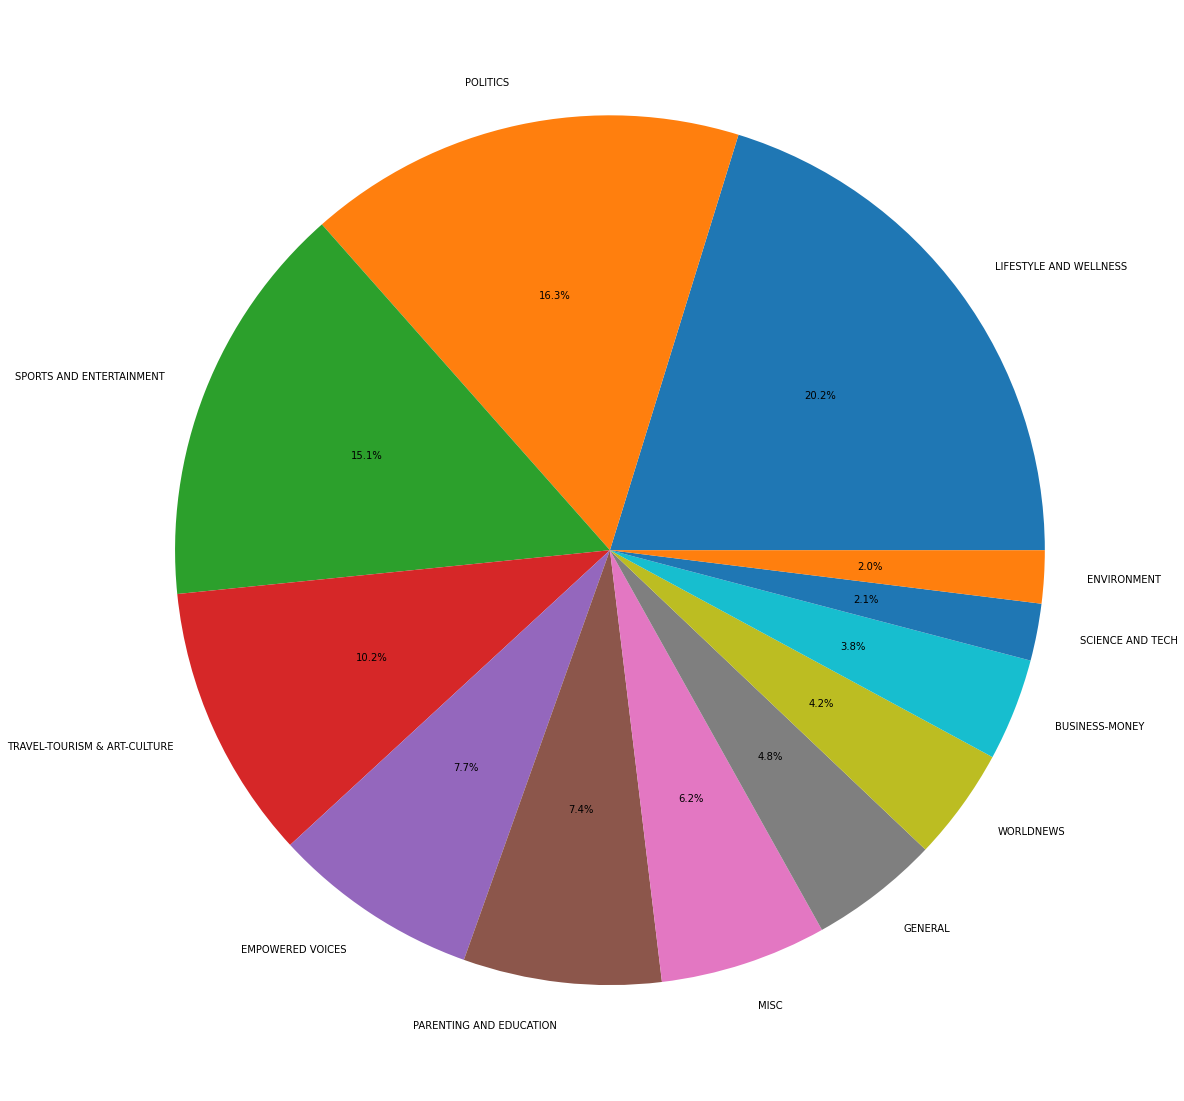

In [10]:
fig = plt.figure(figsize=(20,20))
plt.pie(dataset['category'].value_counts().values, labels=dataset['category'].value_counts().index, autopct='%1.1f%%')

<h3> Removing empty values and duplicates

In [11]:
df = dataset.copy() # creating a copy of the dataset

In [12]:
df.duplicated().sum()  # total duplicates

473

In [13]:
df.drop_duplicates(keep='last', inplace=True)

In [14]:
df.duplicated(subset=['short_description', 'headline']).sum()

15

In [15]:
df.drop_duplicates(subset=['short_description', 'headline'], keep='last', inplace=True)

In [16]:
print(len(df[df['headline'] == ""]))

2


In [17]:
df.loc[df['headline'] == "", 'headline'] =np.nan
df.dropna(subset=['headline'], inplace=True)
print(len(df[df['headline'] == ""]))

0


In [18]:
print(len(df[df['short_description'] == ""]))

19610


In [19]:
df.loc[df['short_description'] == "", 'short_description'] = np.nan
df.dropna(subset=['short_description'], inplace=True)
print(len(df[df['short_description'] == ""]))

0


<h3> Data Tidying </h3>

In [20]:
from sklearn.utils import shuffle
df =shuffle(df)
df.reset_index(inplace=True, drop=True)

In [21]:
df.head()

,category,headline,short_description
0,SPORTS AND ENTERTAINMENT,It's Always No Shave Meow-Vember For Mustache Kitten,Paw-fect style.
1,TRAVEL-TOURISM & ART-CULTURE,$12 Burger Anchors New McSwiss Menu,"TV advertising boasts it has everything a burger should: ""character, taste and size."""
2,PARENTING AND EDUCATION,10 Truths About Taking Little Ones to Disney,"We played ""Mommy do you have any more trash for me to throw out?"" for longer than the entire duration of The Jungle Cruise."
3,ENVIRONMENT,"Someone's Shooting Sea Otters In California, And Officials Want Answers","They are offering at least $10,000 for information leading to an arrest."
4,GENERAL,"Give the Urban Poor Opportunity, Not Just Charity",Providing the poor and marginalized with employment is the best way to help them lift themselves out of poverty.


In [22]:
df['desc'] = df['headline'].astype(str)+"-"+df['short_description']
df.drop(columns =['headline', 'short_description'], axis=1, inplace=True)
df.astype(str)
df.head()

,category,desc
0,SPORTS AND ENTERTAINMENT,It's Always No Shave Meow-Vember For Mustache Kitten-Paw-fect style.
1,TRAVEL-TOURISM & ART-CULTURE,"$12 Burger Anchors New McSwiss Menu-TV advertising boasts it has everything a burger should: ""character, taste and size."""
2,PARENTING AND EDUCATION,"10 Truths About Taking Little Ones to Disney-We played ""Mommy do you have any more trash for me to throw out?"" for longer than the entire duration of The Jungle Cruise."
3,ENVIRONMENT,"Someone's Shooting Sea Otters In California, And Officials Want Answers-They are offering at least $10,000 for information leading to an arrest."
4,GENERAL,"Give the Urban Poor Opportunity, Not Just Charity-Providing the poor and marginalized with employment is the best way to help them lift themselves out of poverty."


<h2> Tokenizing and Padding </h2>

In [23]:
X,Y =df['desc'], df['category']

#Dividing our data as the following:
# Train data : 80%
# Test data : 10%
# Validation data : 10%

X_train, X_val, y_train, y_val = train_test_split(X,Y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

In [24]:
vocab_size =20000
max_length =150
trunc_type = 'post'
padding_type = 'post'
oov_tok="<OOV>"

In [25]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

word_index=tokenizer.word_index

X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen = max_length, padding = padding_type, truncating = trunc_type)
y_train = np.asarray(y_train)
y_train = pd.get_dummies(y_train)

X_val = tokenizer.texts_to_sequences(X_val)
X_val = pad_sequences(X_val, maxlen = max_length, padding = padding_type, truncating = trunc_type)
y_val = np.asarray(y_val)
y_val = pd.get_dummies(y_val)

train_set = np.array(X_train)
val_set = np.array(X_val)

train_label = np.array(y_train)
val_label = np.array(y_val)

y_test = pd.get_dummies(y_test)
y_test = np.asarray(y_test)
y_test = np.argmax(y_test, axis=1)

print(train_set.shape)
print(train_label.shape)
print(val_set.shape)
print(val_label.shape)


(144602, 150)
(144602, 12)
(18075, 150)
(18075, 12)


<h2> Embedding Matrix for our Model </h2>

In [26]:
num_tokens = len(tokenizer.word_index.items()) + 2
embedding_dim = 100
hits = 0
misses = 0

embeddings_index = {}
with open("glove.6B.100d.txt", encoding="utf8") as f:
    for line in f:
        word, coefs = line.split(maxsplit = 1)
        coefs = np.fromstring(coefs, "f", sep = " ")
        embeddings_index[word] = coefs
        
print("Found %s word vectors." % len(embeddings_index))


Found 400000 word vectors.


<h6> Preparing Embedding Matrix </h6>

In [27]:
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1

print("Converted %d words (%d misses)" % (hits,misses))

Converted 65397 words (37546 misses)


<h2> Training our Model </h2>

In [28]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 3, min_delta = 0.0001)
tf.keras.backend.clear_session()
embed_size = 100
model = keras.models.Sequential([
    Embedding(num_tokens, embedding_dim, embeddings_initializer = keras.initializers.Constant(embedding_matrix), mask_zero = True, input_shape = [None], trainable =False),
    keras.layers.Bidirectional(keras.layers.LSTM(512, dropout = 0.4)),
    keras.layers.Dense(12, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         10294500  
_________________________________________________________________
bidirectional (Bidirectional (None, 1024)              2510848   
_________________________________________________________________
dense (Dense)                (None, 12)                12300     
Total params: 12,817,648
Trainable params: 2,523,148
Non-trainable params: 10,294,500
_________________________________________________________________


In [29]:
opt = keras.optimizers.Adam(learning_rate = 0.001)
model.compile(loss = "categorical_crossentropy", optimizer = opt, metrics = ["accuracy"])

history = model.fit(train_set, train_label, batch_size = 20, steps_per_epoch = len(X_train) // 20, validation_data = (val_set, val_label), validation_steps = len(val_set) // 20 , epochs =20, callbacks = early_stop)

Epoch 1/20
7230/7230 [==============================] - 14637s 2s/step - loss: 1.1534 - accuracy: 0.6309 - val_loss: 0.9581 - val_accuracy: 0.6941
Epoch 2/20
7230/7230 [==============================] - 14557s 2s/step - loss: 0.9558 - accuracy: 0.6905 - val_loss: 0.9070 - val_accuracy: 0.7051
Epoch 3/20
7230/7230 [==============================] - 17435s 2s/step - loss: 0.8797 - accuracy: 0.7137 - val_loss: 0.8702 - val_accuracy: 0.7167
Epoch 4/20
7230/7230 [==============================] - 14924s 2s/step - loss: 0.8211 - accuracy: 0.7309 - val_loss: 0.8639 - val_accuracy: 0.7215
Epoch 5/20
7230/7230 [==============================] - 15064s 2s/step - loss: 0.7766 - accuracy: 0.7441 - val_loss: 0.8723 - val_accuracy: 0.7226
Epoch 6/20
7230/7230 [==============================] - 15186s 2s/step - loss: 0.7381 - accuracy: 0.7549 - val_loss: 0.8834 - val_accuracy: 0.7234
Epoch 7/20
7230/7230 [==============================] - 15864s 2s/step - loss: 0.7076 - accuracy: 0.7644 - val_loss: 0

<h2> Evaluating and Making Predictions

In [30]:
classes = dataset['category'].value_counts().index

def prediction(inference_data) :
    X = tokenizer.texts_to_sequences(inference_data)
    X = pad_sequences(X, maxlen = max_length, padding = padding_type, truncating = trunc_type)
    pred = model.predict(X)
    pred_value = tf.argmax(pred, axis = 1).numpy()
    return pred_value

In [31]:
y_pred = prediction(X_test)
print(classification_report(np.asarray(y_test), np.asarray(y_pred)))

print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.59      0.59       669
           1       0.57      0.54      0.56      1396
           2       0.50      0.54      0.52       330
           3       0.54      0.38      0.44       795
           4       0.78      0.83      0.80      3861
           5       0.74      0.74      0.74      1124
           6       0.64      0.79      0.70      1432
           7       0.81      0.76      0.78      2969
           8       0.61      0.50      0.55       377
           9       0.73      0.69      0.71      2444
          10       0.77      0.81      0.79      1971
          11       0.73      0.71      0.72       708

    accuracy                           0.72     18076
   macro avg       0.67      0.66      0.66     18076
weighted avg       0.72      0.72      0.72     18076

[[ 395   15   13   12   76   15   21   44   27   18   25    8]
 [  14  751    5   46  107   49   92  107    2  174   34   15]
 [  10 